In [9]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap


In [10]:
# JEU DE DONNEES BRUT
df = pd.read_csv("../data/cardio_train.csv", sep = ";", index_col="id")

# JEU DE DONNEES NETTOYE
# df = pd.read_csv("cardio_train_clean.csv", index_col="id")

df["age"] = df["age"] / 365

In [11]:
# pas de doublons
df.duplicated().sum()

np.int64(24)

In [12]:
df.shape

(70000, 12)

In [13]:
# Valeurs manquantes - ligne
df.dropna().shape
# Valeurs manquantes - ligne
df.dropna(axis=1).shape

(70000, 12)

In [14]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Les ages sont compris entre 29 et 64 ans.
Toutes les observations sont des adultes.

In [15]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


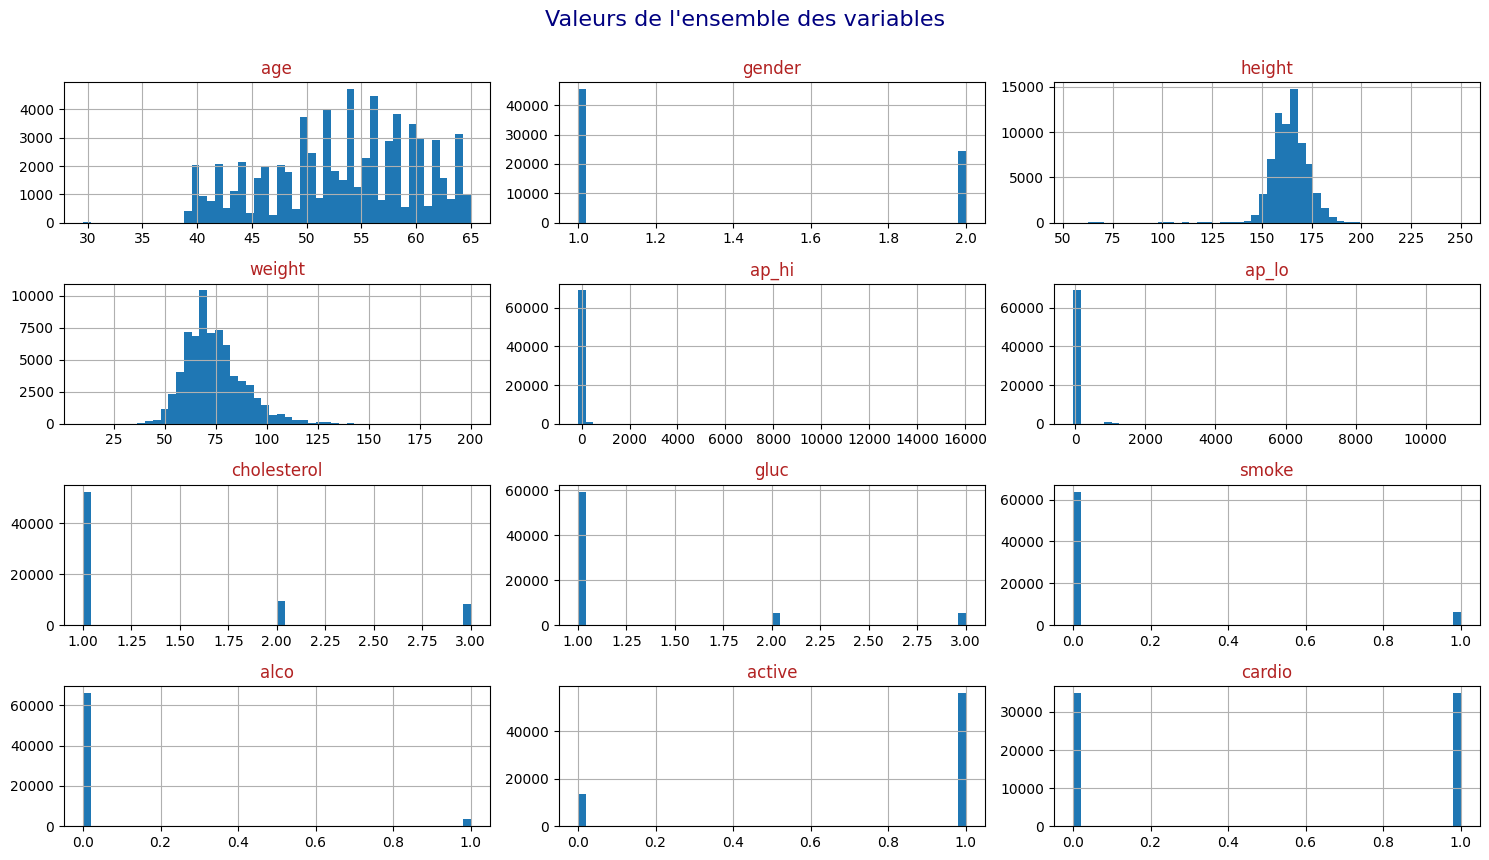

In [16]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Text(0.5, 1.0, 'Matrice de corrélation')

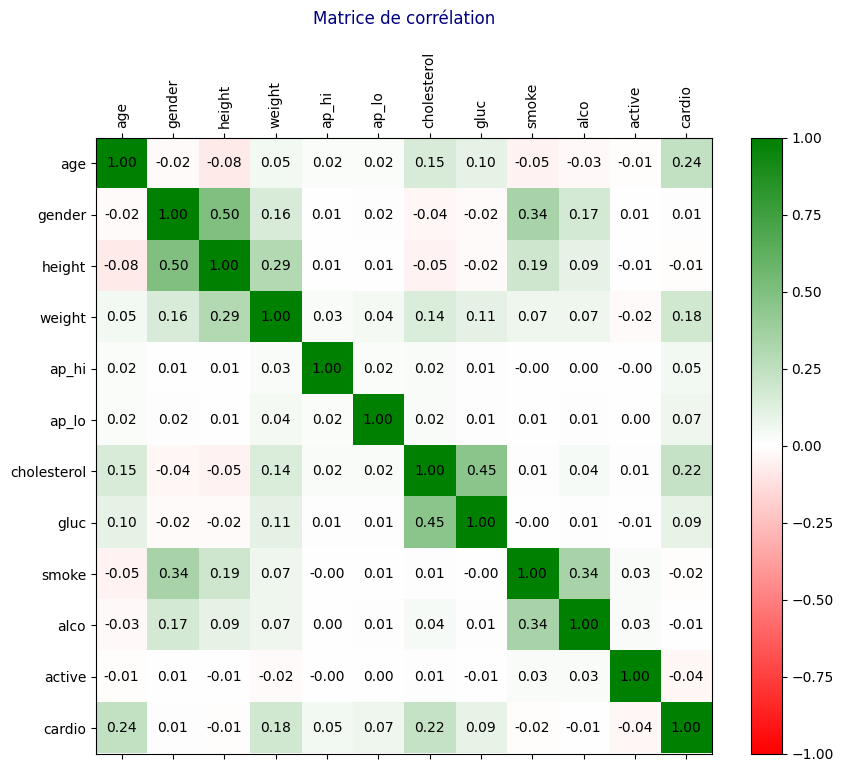

In [17]:
# Création d'une colormap rouge → blanc → vert
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "white", "green"], N=256)

corr = df.corr()

# Tracé de la matrice
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Axes et titre
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matrice de corrélation", pad=20)
plt.colorbar(cax)

# Ajouter les valeurs dans chaque case
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Matrice de corrélation", pad=20, color="navy")
# plt.show()

In [18]:
df_numerical = ['height', 'weight', 'age_year', 'ap_hi', 'ap_lo']
df_cardinal = ['smoke', 'alco', 'active', 'cardio', 'gender']
df_ordinal = ['cholesterol', 'gluc']

KeyError: 'age_year'

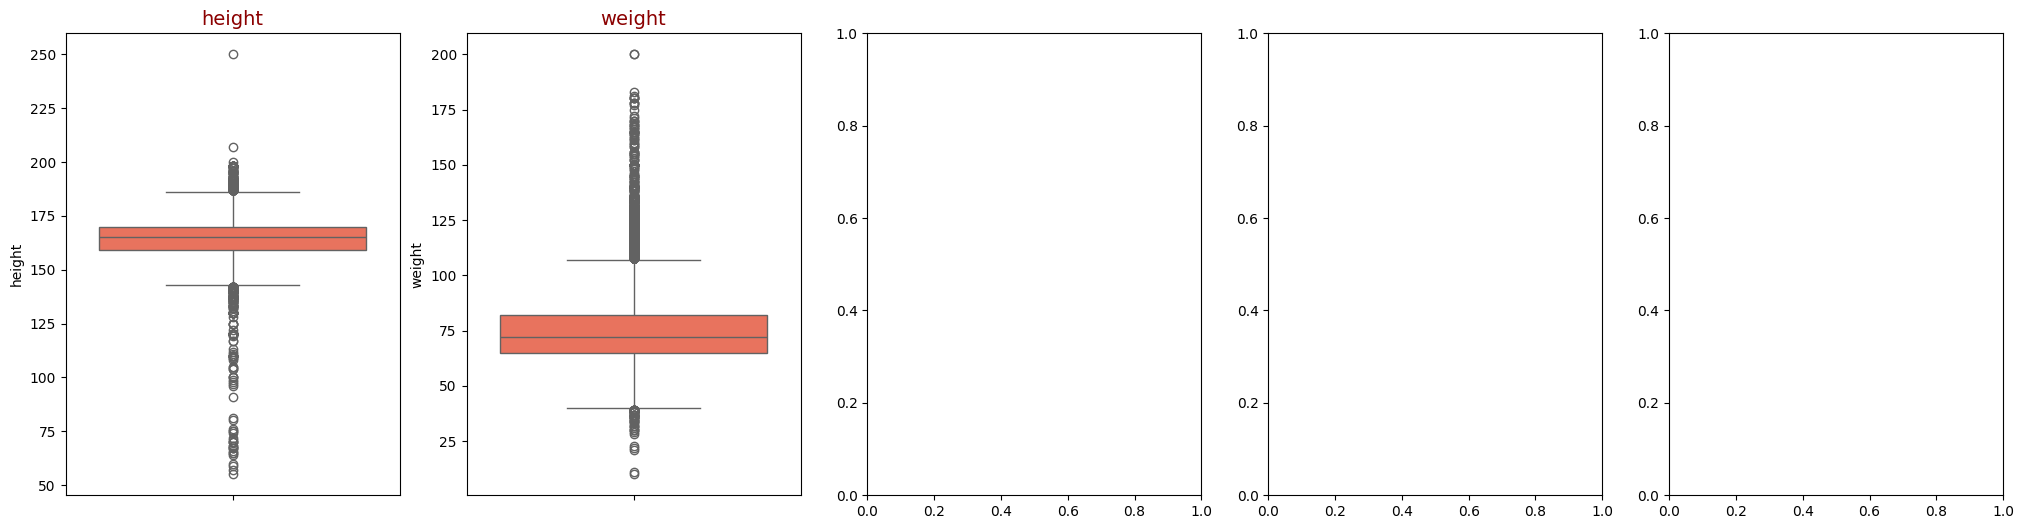

In [19]:
fig, axes = plt.subplots(1, len(df_numerical), figsize=(5 * len(df_numerical), 6))

for ax, col in zip(axes, df_numerical):
    sns.boxplot(y=df[col], ax=ax, color='tomato')
    ax.set_title(col, fontsize=14, color='darkred')

plt.suptitle("Répartition des observations | variables continues", fontsize=20, color="blue", y=1.03)
plt.tight_layout()


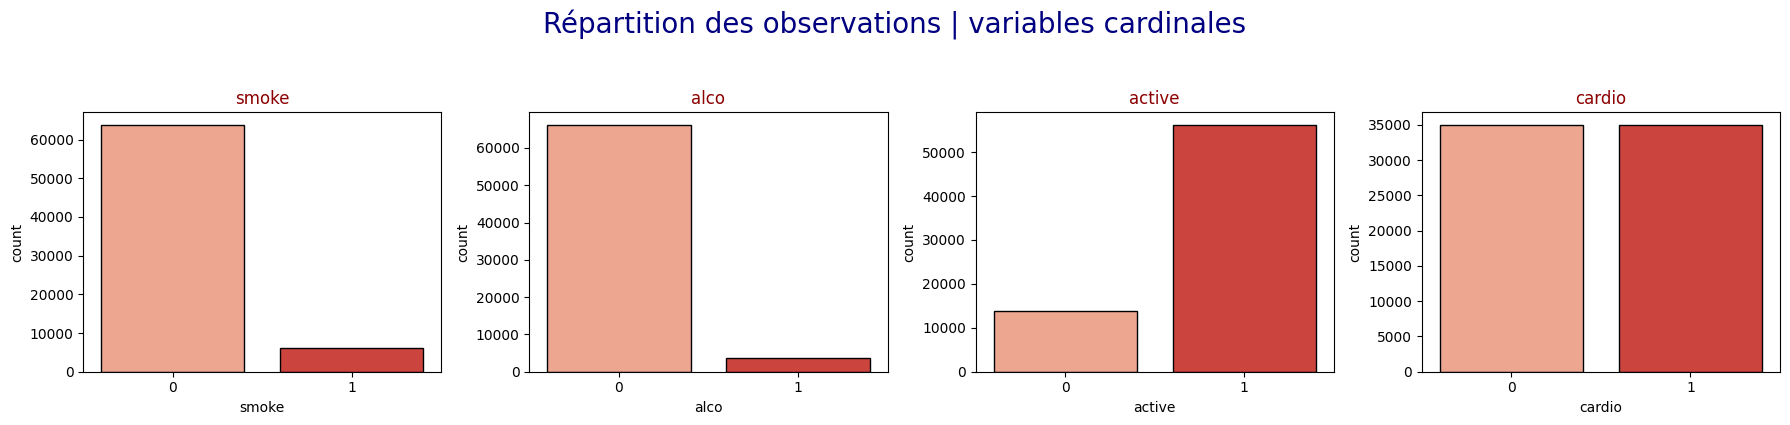

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, col in zip(axes, df_cardinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Ajouter une bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables cardinales", fontsize=20, color='navy', y=1.05)
plt.tight_layout()


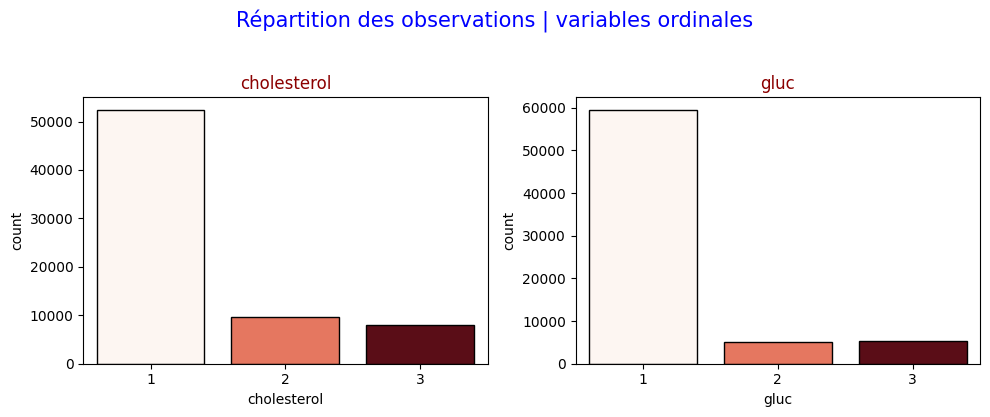

In [ ]:
fig, axes = plt.subplots(1, len(df_ordinal), figsize=(5 * len(df_ordinal), 4))

for ax, col in zip(axes, df_ordinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables ordinales", fontsize=15, color="blue", y=1.03)
plt.tight_layout()

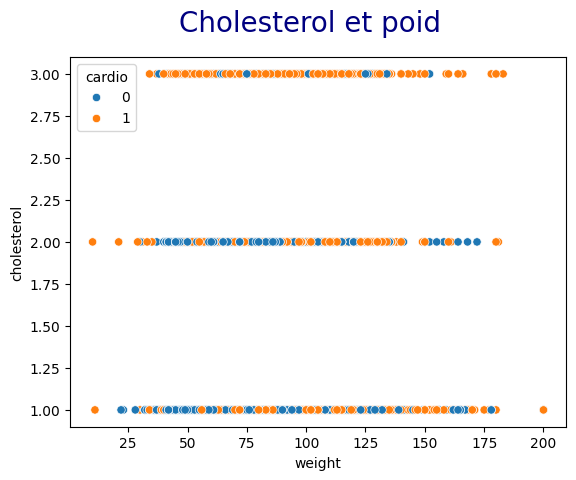

In [ ]:
sns.scatterplot(data=df, x='weight', y='cholesterol', hue='cardio')
plt.suptitle("Cholesterol et poid", color="navy", fontsize=20)
plt.show()

Le cholesterol semble être un facteur aggravant

Text(0.5, 0.98, "Nombre des cas en fonction de l'âge")

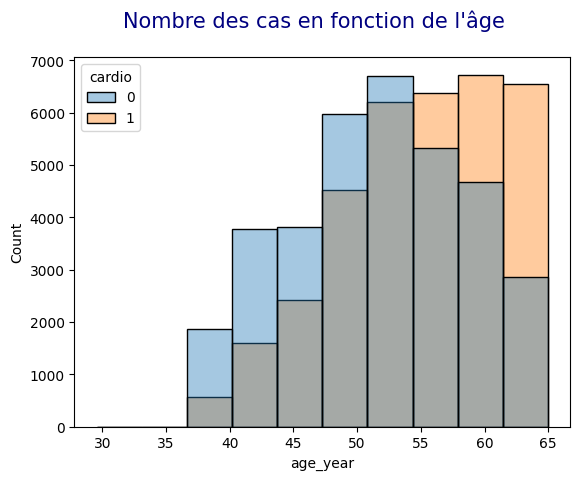

In [ ]:
sns.histplot(
    data=df,
    x='age_year',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction de l'âge", color="navy", fontsize=15)

Text(0.5, 0.98, 'Nombre des cas en fonction du poid')

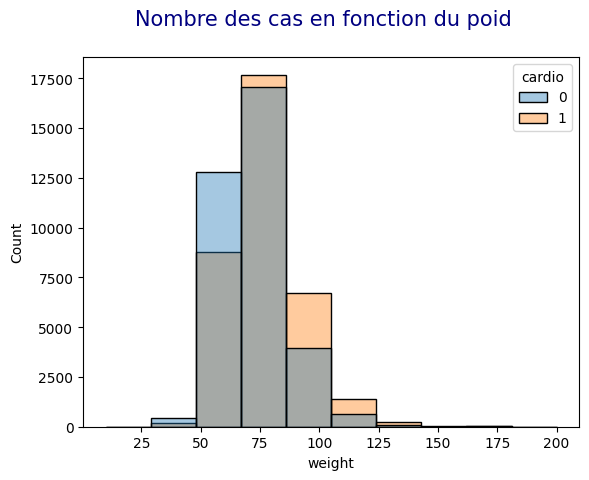

In [ ]:
sns.histplot(
    data=df,
    x='weight',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction du poid", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension diastolique')

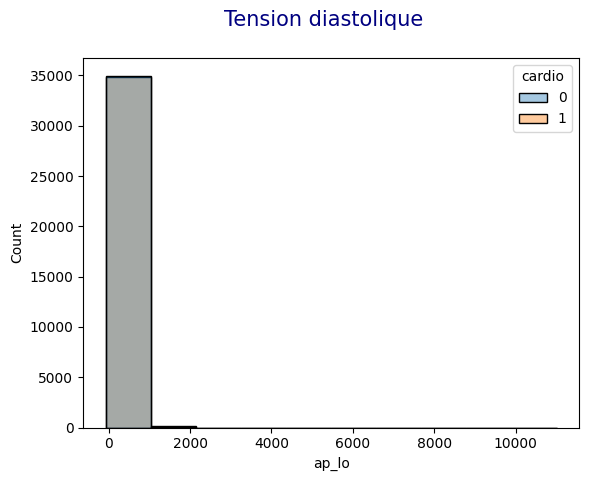

In [ ]:
sns.histplot(
    data=df,
    x='ap_lo',
    hue='cardio',
    bins=10,
    multiple='layer',  
    alpha=0.4,        
    stat='count'        
)
plt.suptitle("Tension diastolique", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension sistoliqpue')

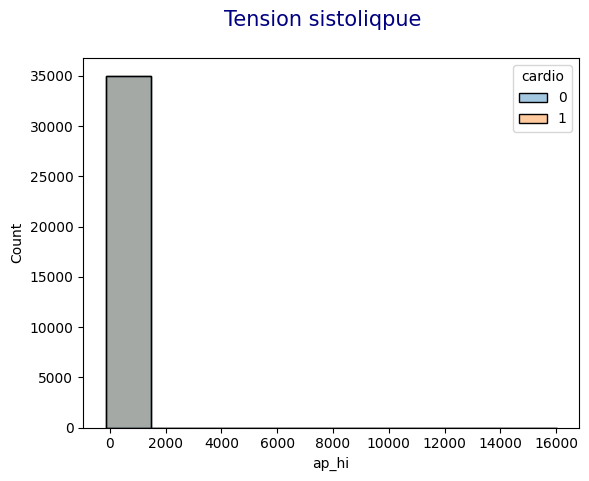

In [ ]:
sns.histplot(
    data=df,
    x='ap_hi',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)
plt.suptitle("Tension sistoliqpue", color="navy", fontsize=15)

<Axes: xlabel='cholesterol', ylabel='Count'>

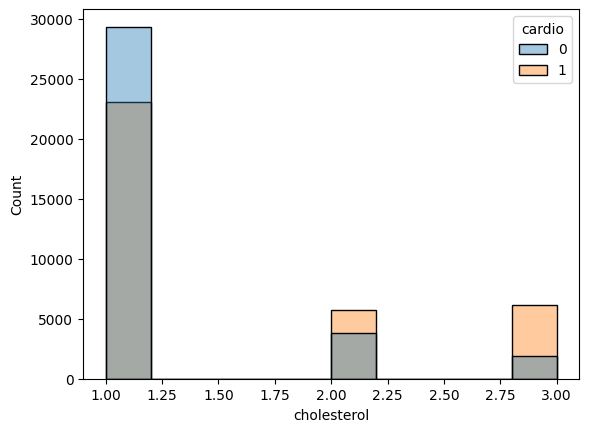

In [ ]:
sns.histplot(
    data=df,
    x='cholesterol',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)